In [1]:
import pickle
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import sys,os

sys.path.append('../')
import visualizations
import constants
from config import targets

In [4]:
# Set parameters
constants.HISTORY_LENGTH=1
GRID_SIZE = 25
constants.GRID_SIZE=GRID_SIZE
TARGET = targets(GRID_SIZE)['square']
ITERATIONS = 50

In [3]:
filename = 'data/exp1/error/error_square25_10gens_2ps_50i_k45_N4_run1.p'

with open(filename, 'rb') as f:
    best,stats = pickle.load(f)

In [5]:
# Run NCA as in training
train_history = best.playback(iterations=ITERATIONS)

# Initial state
init_grid = train_history[0]

# Final state
final_state = train_history[-1]

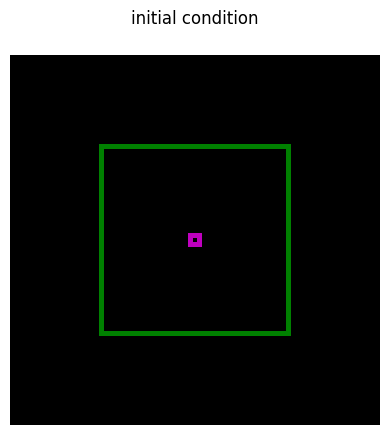

In [6]:
# Visualize initial condition
visualizations.display_body_signal(init_grid, target=TARGET, title='initial condition', original_size=GRID_SIZE)


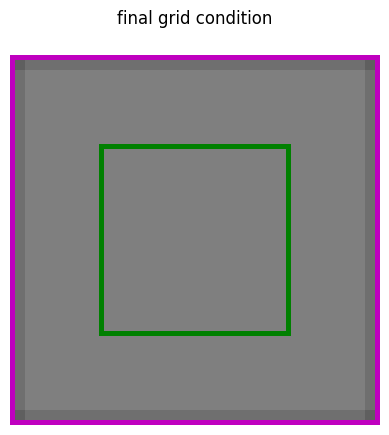

Loss: 0.5534117647058824
Empowerment (k=1): 0.8205726627732282


In [7]:
# Visualize final grid state of the NCA
visualizations.display_body_signal(final_state, target=TARGET, title='final grid condition', original_size=GRID_SIZE)
# visualizations.display_body_signal(final_state, target=TARGET, title='', original_size=GRID_SIZE, save=True, fn='gecco23_figs/best_xenobot.png')

# Print loss and empowerment
best.evaluate(['error','MI'], TARGET,g=2000)
print('Loss:', best.get_objective('error'))
print('Empowerment (k={}):'.format(constants.HISTORY_LENGTH), best.get_objective('MI')*-1)

In [9]:
# Save movie of damage recovery
os.makedirs('results/', exist_ok=True)
os.makedirs('results/exp1', exist_ok=True)
video_filename = 'results/exp1/'+filename.split('/')[-1].split('.')[0]+'.mp4'
visualizations.save_movie(train_history, video_filename, original_size=GRID_SIZE)